In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [45]:
x,y = make_blobs(n_samples = 1000 , centers = 3 , n_features= 3)

In [46]:
x

array([[ -6.10011547,  -3.76411412,   2.93671453],
       [ -6.89166648, -11.28553286,   4.66937762],
       [ -7.6513673 , -10.9503974 ,   6.54767937],
       ...,
       [ -9.65693341,  -3.9669697 ,   1.59556686],
       [ -5.84080834,  -9.82755312,   8.3564328 ],
       [ -7.9458636 ,  -2.37402574,   3.44826819]], shape=(1000, 3))

In [47]:
y

array([2, 1, 1, 2, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0,
       1, 1, 1, 2, 0, 1, 0, 0, 0, 2, 2, 2, 1, 2, 0, 1, 0, 1, 1, 2, 0, 1,
       0, 1, 1, 0, 2, 1, 2, 0, 2, 1, 1, 1, 1, 0, 2, 1, 2, 0, 2, 2, 2, 2,
       0, 2, 1, 0, 0, 2, 1, 2, 1, 2, 2, 0, 0, 1, 0, 0, 2, 2, 2, 0, 0, 2,
       2, 1, 2, 1, 1, 1, 0, 2, 2, 1, 0, 1, 0, 1, 1, 2, 2, 2, 1, 0, 2, 2,
       2, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 1, 1, 2, 1, 0, 2, 1, 0, 0, 0, 0,
       1, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1, 1, 2, 2, 2, 1, 1, 0, 2, 2, 0, 0,
       2, 2, 2, 0, 1, 1, 0, 1, 0, 2, 2, 0, 0, 1, 2, 2, 1, 1, 2, 0, 2, 2,
       2, 0, 1, 0, 0, 1, 1, 0, 1, 2, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 2, 1,
       1, 0, 0, 1, 1, 2, 2, 2, 0, 2, 1, 0, 0, 2, 1, 1, 2, 1, 1, 2, 2, 1,
       1, 1, 0, 1, 1, 0, 0, 2, 0, 2, 1, 2, 0, 1, 1, 1, 1, 1, 0, 2, 0, 1,
       1, 2, 0, 2, 0, 1, 0, 0, 1, 0, 1, 2, 2, 2, 1, 2, 2, 0, 1, 1, 2, 1,
       2, 0, 2, 1, 2, 1, 1, 1, 1, 2, 0, 2, 1, 1, 2, 1, 1, 0, 0, 2, 1, 2,
       0, 1, 1, 0, 1, 0, 0, 2, 1, 1, 2, 1, 0, 1, 2,

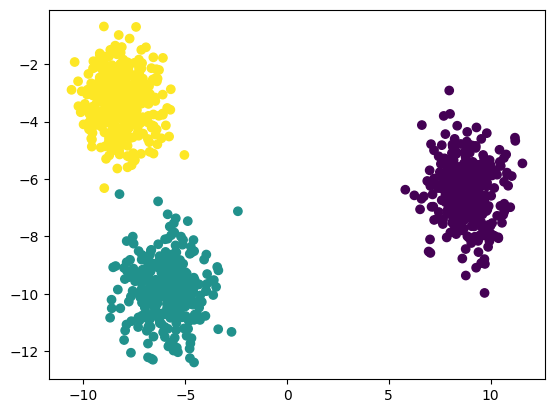

In [48]:
plt.scatter(x[:,0],x[:,1],c = y)

In [49]:
##standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [50]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [51]:
from sklearn.cluster import KMeans
##elbow method 
wcss = []
for k in range (1,11):
    kmeans= KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(x_train_scaled)
    wcss.append(kmeans.inertia_)

c:\Users\Adwait\anaconda3\envs\ml-env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Adwait\anaconda3\envs\ml-env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Adwait\anaconda3\envs\ml-env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Adwait\anaconda3\envs\ml-env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarn

In [52]:
wcss

[2009.9999999999998,
 800.3428710632024,
 207.10235360357223,
 184.07500156117578,
 162.44281702526192,
 143.63867935385548,
 132.1002551829386,
 112.02856006853477,
 103.23510241816878,
 101.00634109912812]

Text(0.5, 1.0, 'Elbow Method')

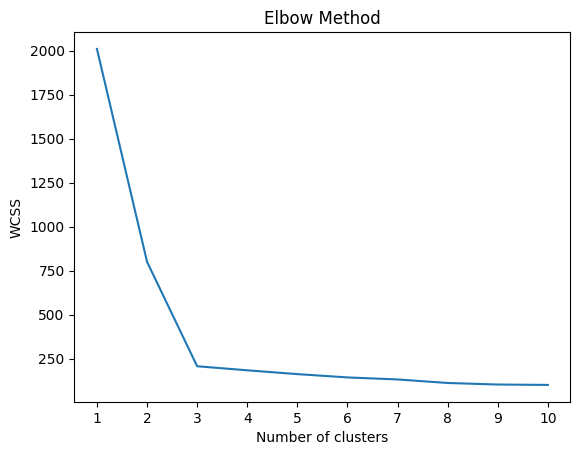

In [53]:
##plot elbow curve 
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')

In [58]:
kmeans = KMeans(n_clusters=3, init='k-means++')

In [59]:
kmeans.fit_predict(x_train_scaled)

c:\Users\Adwait\anaconda3\envs\ml-env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


array([2, 2, 1, 0, 2, 0, 2, 2, 0, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 0, 1,
       0, 1, 1, 1, 2, 2, 0, 2, 2, 0, 2, 0, 2, 1, 0, 1, 2, 1, 2, 2, 1, 1,
       1, 1, 0, 2, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 2, 2, 1, 2, 0, 0,
       2, 2, 2, 2, 0, 0, 2, 2, 2, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 2, 0,
       1, 1, 2, 0, 0, 2, 0, 2, 2, 1, 0, 0, 2, 0, 0, 1, 2, 0, 0, 2, 0, 2,
       0, 1, 0, 1, 0, 0, 1, 2, 2, 1, 2, 0, 1, 2, 1, 1, 1, 1, 1, 2, 0, 2,
       0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 2, 1,
       2, 0, 1, 0, 0, 2, 2, 0, 0, 1, 1, 0, 2, 2, 0, 0, 2, 1, 0, 0, 1, 1,
       2, 0, 1, 2, 2, 0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 0, 0, 2, 1, 1, 1, 2,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 2, 1, 1, 0, 0, 0, 2, 2, 1, 0, 1, 1, 2,
       0, 2, 2, 1, 2, 0, 2, 2, 0, 0, 1, 2, 1, 0, 0, 2, 1, 1, 1, 1, 1, 0,
       2, 2, 0, 2, 0, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 1, 2, 2, 2, 2, 1,
       1, 2, 0, 1, 0, 2, 1, 0, 0, 2, 2, 0, 0, 0, 1, 1, 1, 2, 0, 1, 1, 0,
       0, 0, 1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0, 0, 2,

In [60]:
y_pred = kmeans.predict(x_test_scaled)

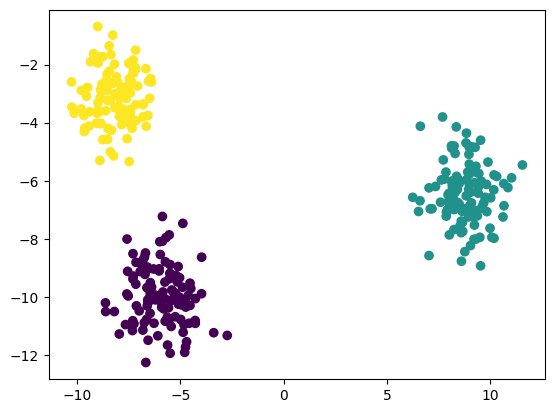

In [61]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_pred)

In [62]:
##for validating k value we use 
##kneelocator 
##silhoutte scoring
!pip install kneed


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [65]:
from kneed import KneeLocator
k1 = KneeLocator(range(1,11), wcss,curve = 'convex',direction='decreasing')

In [66]:
k1.elbow

np.int64(3)

In [68]:
##silhoutte scoring 
from sklearn.metrics import silhouette_score
silhouette_scores = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(x_train_scaled)
    score = silhouette_score(x_train_scaled, kmeans.labels_)
    silhouette_scores.append(score)

c:\Users\Adwait\anaconda3\envs\ml-env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Adwait\anaconda3\envs\ml-env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Adwait\anaconda3\envs\ml-env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Adwait\anaconda3\envs\ml-env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarn

In [69]:
silhouette_scores

[np.float64(0.5843699038574195),
 np.float64(0.7212802311822765),
 np.float64(0.5617145906251296),
 np.float64(0.42954425134226426),
 np.float64(0.451353888957883),
 np.float64(0.30535484888265485),
 np.float64(0.3068423215824688),
 np.float64(0.3073551867906815),
 np.float64(0.2981219856578198)]

Text(0.5, 1.0, 'silhoutte score method')

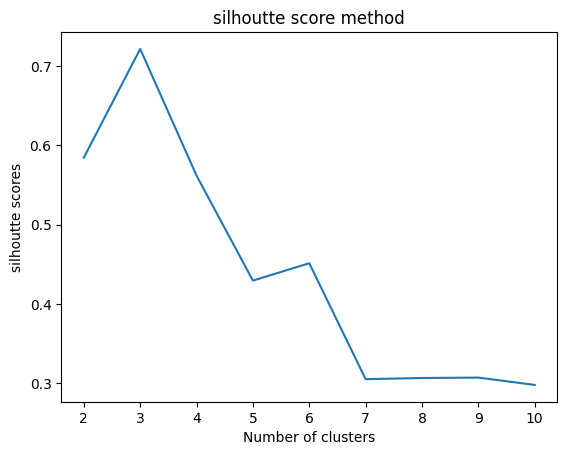

In [71]:
##plot elbow curve 
plt.plot(range(2,11),silhouette_scores)
plt.xticks(range(2,11))
plt.xlabel('Number of clusters')
plt.ylabel('silhoutte scores')
plt.title('silhoutte score method')